In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import tensorflow as tf
from tensorflow.keras import layers, models

# Image Compression
input_path = 'input.jpg'
output_path_jpeg = 'compressed.jpg'
output_path_png = 'compressed.png'
quality_jpeg = 50
quality_png = 9

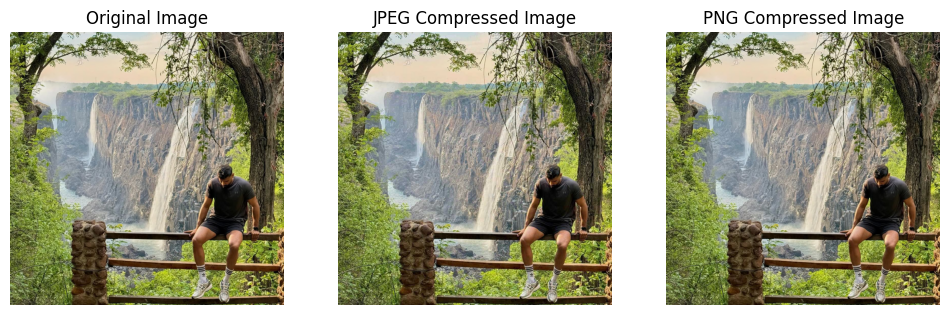

In [ ]:
img = cv2.imread(input_path)
cv2.imwrite(output_path_jpeg, img, [int(cv2.IMWRITE_JPEG_QUALITY), quality_jpeg])
cv2.imwrite(output_path_png, img, [int(cv2.IMWRITE_PNG_COMPRESSION), quality_png])

original = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
jpeg_compressed = cv2.cvtColor(cv2.imread(output_path_jpeg), cv2.COLOR_BGR2RGB)
png_compressed = cv2.cvtColor(cv2.imread(output_path_png), cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(original)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(jpeg_compressed)
plt.title("JPEG Compressed Image")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(png_compressed)
plt.title("PNG Compressed Image")
plt.axis("off")

plt.show()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.8365 - loss: 0.5542 - val_accuracy: 0.9761 - val_loss: 0.0756
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9788 - loss: 0.0679 - val_accuracy: 0.9864 - val_loss: 0.0434
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9865 - loss: 0.0424 - val_accuracy: 0.9900 - val_loss: 0.0310
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9899 - loss: 0.0321 - val_accuracy: 0.9879 - val_loss: 0.0370
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9925 - loss: 0.0252 - val_accuracy: 0.9882 - val_loss: 0.0361
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9936 - loss: 0.0204 - val_accuracy: 0.9920 - val_loss: 0.0243
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9939 - loss: 0.0193 - val_accuracy: 0.9910 - val_loss: 0.0295
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9957 - loss: 0.0138 - val_accuracy: 0

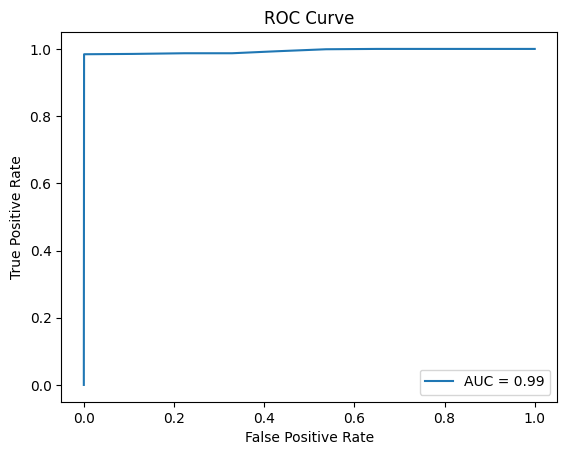

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_fscore_support, accuracy_score
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = x_train[..., np.newaxis]
x_test = x_test[..., np.newaxis]

model_mnist = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model_mnist.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_mnist.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))
y_pred = model_mnist.predict(x_test).argmax(axis=1)

accuracy = accuracy_score(y_test, y_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='macro')
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

fpr, tpr, _ = roc_curve(y_test, y_pred, pos_label=y_test.max())
auc_score = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 20s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 46s 51ms/step - accuracy: 0.2293 - loss: 2.0758 - val_accuracy: 0.3601 - val_loss: 1.7214
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 34s 43ms/step - accuracy: 0.3747 - loss: 1.6819 - val_accuracy: 0.5030 - val_loss: 1.4230
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 34s 44ms/step - accuracy: 0.5313 - loss: 1.3185 - val_accuracy: 0.6014 - val_loss: 1.2081
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 35s 44ms/step - accuracy: 0.6359 - loss: 1.0530 - val_accuracy: 0.6580 - val_loss: 0.9689
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 36s 45ms/step - accuracy: 0.6953 - loss: 0.8881 - val_accuracy: 0.7316 - val_loss: 0.8018
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 43ms/step - accuracy: 0.7309 - loss: 0.7996 - val_accuracy: 0.7494 - val_loss: 0.7694
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 35s 44ms/step - accuracy: 0.7518 - loss: 0.7303 - val_accuracy: 0.7563 - val_loss: 0.7259
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 35s 45ms/step - accuracy: 0.7737 - loss: 0.6605 - val_accurac

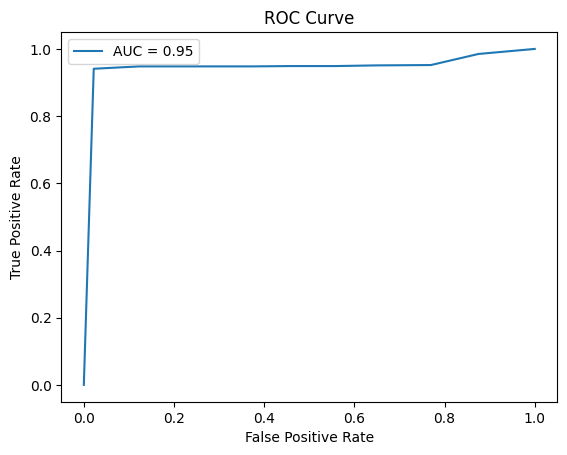

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(x_train)

model_cifar10 = models.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

model_cifar10.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_cifar10.fit(datagen.flow(x_train, y_train, batch_size=64), epochs=20, validation_data=(x_test, y_test))

y_pred = model_cifar10.predict(x_test).argmax(axis=1)
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

fpr, tpr, _ = roc_curve(y_test, y_pred, pos_label=y_test.max())
auc_score = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Overall Accuracy: {accuracy:.4f}")

precision = precision_score(y_test, y_pred, average='macro')  # Macro-averaged precision
print(f"Overall Precision (Macro): {precision:.4f}")

Overall Accuracy: 0.8473
Overall Precision (Macro): 0.8510
